<a href="https://colab.research.google.com/github/nogfe4/Chemical-Engineering-Thermodynamics/blob/main/Thermodynamics%20-%20Smith%20Vann%20Ness%20-%20Notebooks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CÁPITULO 4 - Efeitos Térmicos**

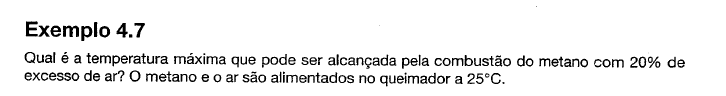

In [ ]:
import numpy as np
from numpy import array

# @author: nogfe4
# CH4 + 2O2 -> CO2 + 2H20

# Definindo a função de integração que calcula o DeltaH (essa função será zerada no N.R. para acharmos o valor de T):
def MCPH(T0,T,A,B,C,D):
  return  R * (A* (T - T0) + (B/2) * (T**2 - T0**2) + (C/3) * (T**3 - T0**3) -  D * ((1/T)-(1/T0)))

#Dados
R = 8.314;
del_H_CO2 = -393509;		#Tabela C.4
del_H_O2 = -241818;			#Tabela C.4
del_H_CH4 = -74520;			#Tabela C.4
del_H_298 = del_H_CO2+(2*del_H_O2)-del_H_CH4;
del_Hp = -del_H_298;

# Cálculos
#Número de Mols
n_CH4 = 1;
n_O2 = 2+(0.2*2);			#20% Excesso
n_N2 = n_O2*(79./21);
# Mols dos produtos (CO2, H2O, O2, N2)
np_array = array([1, 2, 0.4, 9.03])

# Coeficientes das propriedades caloríficas (tabela C.1)
A = array([5.457, 3.470, 3.639, 3.280])
B = (10**-3) * array([1.045, 1.450, 0.506, 0.593])
C = (10**-6) * array([0, 0, 0, 0])
D = (10**5) * array([-1.157, 0.121, -0.227, 0.040])

# Propriedades caloríficas totais dos produtos
E_A = np.sum(np_array * A)
E_B = np.sum(np_array * B)
E_C = np.sum(np_array * C)
E_D = np.sum(np_array * D)

# Inicialização
T0 = 298.15
T_guess = 300 # Chute inicial

def MCPH_derivative(T, A, B, C, D):
    "Calcula a derivada da função MCPH em relação a T."
    return R*(A + (B * T) + (C * T * 2) - (D * (1/(T)**2)) )

# Método de Newton-Raphson
error_tolerance = 1e-6 #Tolerância
max_iterations = 1000 #Iterações máximas
iteration = 0

while iteration < max_iterations:
    # Função e sua derivada
    MCPH_value = MCPH(T0, T_guess, E_A, E_B, E_C, E_D)
    MCPH_prime = MCPH_derivative(T_guess, E_A, E_B, E_C, E_D)

    # Resíduo
    f_T = MCPH_value - del_Hp

    # Atualização de Newton-Raphson
    T_new = T_guess - f_T / MCPH_prime

    # Verifica a convergência
    if abs(T_new - T_guess) < error_tolerance:
        break

    T_guess = T_new
    iteration += 1

# Resultado:
if iteration >= max_iterations:
    print("O método de Newton-Raphson não convergiu.")
else:
    print(f"Resultado: {round(T_guess)} K")

Resultado: 2066 K


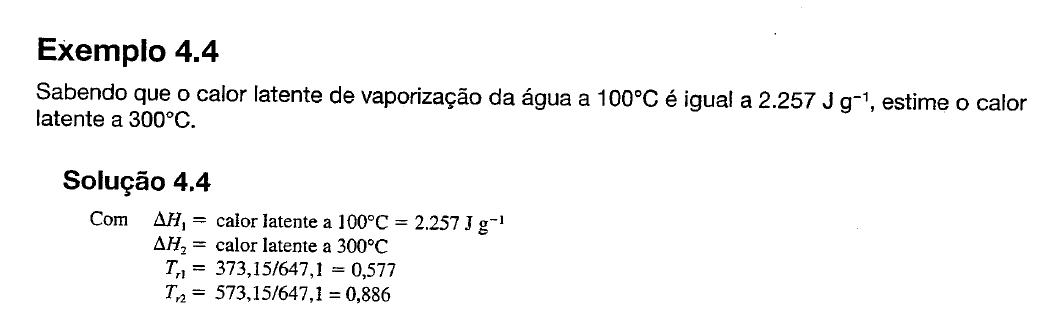

In [ ]:
# @author: nogfe4
dh1 = 2257  # [J/g] - Calor latente a 100 graus
T1 = 100 + 273.15 # [K]
T2 = 300 + 273.15 # [K]
Tr1 = (T1/647.1)
Tr2 = (T2/647.1)

dh2 = dh1*(((1-Tr2)/(1-Tr1))**(0.38))
print(f"O Valor dado nas tabelas de vapor é de: {round(dh2, 2)} J/g")

O Valor dado nas tabelas de vapor é de: 1372.19 J/g


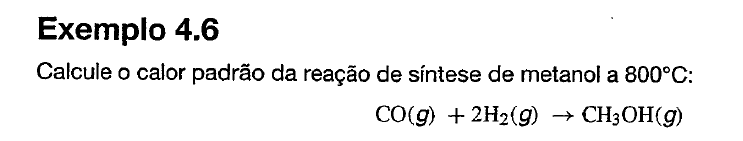

In [ ]:
import numpy as np
from numpy import array

# @author: nogfe4
# CO + 2H2 -> CH3OH

# Definindo a função
def IDCPH(T0,T,A,B,C,D):
    t = T/T0;
    return (A+((B/2)*T0*(t+1))+((C/3)*T0*T0*((t**2)+t+1))+(D/(t*T0*T0)))*(T-T0)

#Dados
R = 8.314;
del_H_CO = -110525;			#Tabela C.4
del_H2 = 0;			#Tabela C.4
del_H_CH3OH = -200660;			#Tabela C.4
dh_0 = del_H_CH3OH - (del_H_CO - del_H2)


# Cálculos
#Número de Mols
n_CH3OH = 1;
n_CO = -1;
n_H2 = -2;
np_array = array([1, -1, -2])

# Coeficientes das propriedades caloríficas (Tabela C.1)
A = array([2.211, 3.376, 3.249])
B = (10**-3) * array([12.216, 0.557, 0.422])
C = (10**-6) * array([-3.450, 0, 0])
D = (10**5) * array([0, -0.031, 0.083])

# Propriedades caloríficas totais dos produtos
E_A = np.sum(np_array * A)
E_B = np.sum(np_array * B)
E_C = np.sum(np_array * C)
E_D = np.sum(np_array * D)


#Temperaturas:
T0 = 298.15
T = 800 + 273.15

#Cálculo do Calor padrão de reação:
ICPH_value = IDCPH(T0, T, E_A, E_B, E_C, E_D)
Dh_0 = dh_0 + (R*ICPH_value)

print(f"O Calor padrão de reação é: {round(Dh_0)} J")

O Calor padrão de reação é: -103566 J


# **CÁPITULO 10  - Equilíbrio Líquido/Vapor: Introdução**

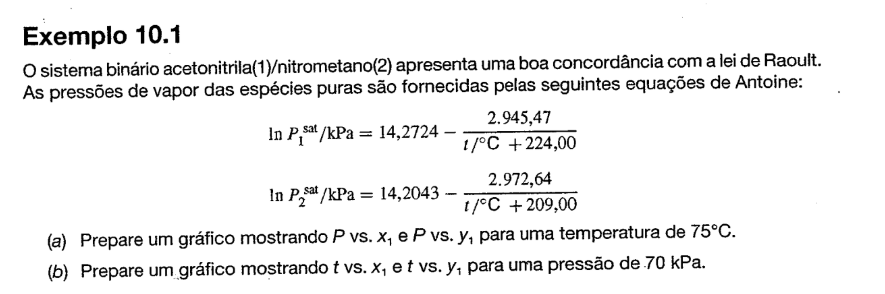

## **Item (a)**

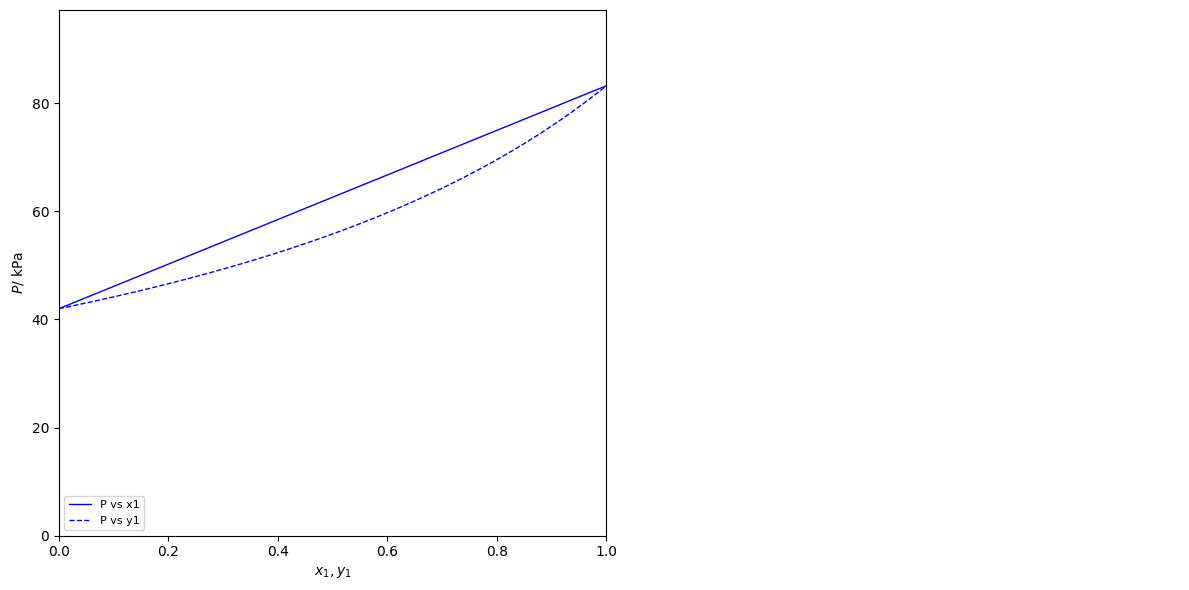

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import plot,subplot,suptitle,xlabel,ylabel
from numpy import array,linspace,exp
import math
# @author: nogfe4


#Dados:
T = 75 + 273.15 # [K]

#Equação de Antoine:
P1_sat = exp((14.2724)-((2945.47)/(T-(273.15-224))))
P2_sat = exp((14.2043)-((2972.64)/(T-(273.15-209))))

P1_sat_ = round(P1_sat, 2)
P2_sat_ = round(P2_sat, 2)
Psat = [P1_sat_, P2_sat_]



#Calculando Frações Molares líquidas
NP = 100
x1 = np.linspace(0., 1., NP)
x2 = 1 - x1

#Usando a lei de Raoult:
P = x1*P1_sat_+x2*P2_sat_
y1 = (x1*P1_sat_)/P
x = np.column_stack((x1, x2))

#Organização do Gráfico:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # 1 linha, 2 colunas

# P vs x1,y1:
axes[0].plot(x1, P, color='blue', linewidth=1.0, label='P vs x1')
axes[0].plot(y1, P, color='blue', linestyle='--', linewidth=1.0, label='P vs y1')
axes[0].set_ylabel(r'$P /$ kPa', fontsize=10)
axes[0].set_xlabel(r'$x_1, y_1$', fontsize=10)
axes[0].legend(loc='lower left', fontsize=8)
axes[0].set_xlim((0., 1.))
axes[0].set_ylim((0., max(P)+ 14))
axes[1].axis('Off')

plt.tight_layout()
plt.show()

## **Item (b)**

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import plot,subplot,suptitle,xlabel,ylabel
from numpy import array,linspace,exp
import math
# @author: nogfe4


#Dados:
P = 70 #[kPa]
t_val = []
y1_val = []


#Equação de Antoine:
def P1_sat(T):
  t = T - 273.15
  return np.exp((14.2724)-((2945.47)/(t+224)))

def P2_sat(T):
  t = T - 273.15
  return np.exp((14.2043)-((2972.64)/(T+209)))

def P1_sat_der(T):
  t = T - 273.15
  return (np.exp((14.2724)-((2945.47)/(t+224))))*((2945.47)/((t+224)**2))

def P2_sat_der(T):
  t = T - 273.15
  return (np.exp((14.2043)-((2972.64)/(T+209))))*((2972.64)/((t+209)**2))


# #Organização do Gráfico:
# fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # 1 linha, 2 colunas

# # P vs x1,y1:
# axes[0].plot(x1, P, color='blue', linewidth=1.0, label='P vs x1')
# axes[0].plot(y1, P, color='blue', linestyle='--', linewidth=1.0, label='P vs y1')
# axes[0].set_ylabel(r'$P /$ kPa', fontsize=10)
# axes[0].set_xlabel(r'$x_1, y_1$', fontsize=10)
# axes[0].legend(loc='lower left', fontsize=8)
# axes[0].set_xlim((0., 1.))
# axes[0].set_ylim((0., max(P)+ 14))
# axes[1].axis('Off')

# plt.tight_layout()
# plt.show()